In [1]:
import math
import numpy as np
import pandas as pd
import torch

from dataclasses import dataclass

def spectral_norm_svd(A: torch.Tensor) -> float:
    # return torch.linalg.matrix_norm(A, ord=2)
    return torch.linalg.svdvals(A.to(torch.float32)).max()

def natural_spectral_norm(A: torch.Tensor) -> float:
    # return torch.linalg.matrix_norm(A, ord='fro')
    return spectral_norm_svd(A) * math.sqrt(A.size(1) / A.size(0))

In [2]:
def factors(n):
    """Returns a set of all factors of n."""
    return set(factor for i in range(1, int(n**0.5) + 1) if n % i == 0 for factor in (i, n//i))

In [3]:
N = [int(2**p) for p in np.linspace(5, 12, 20)]
samples = 10



In [4]:
head_sizes = [16, 32, 48, 64, 80, 96, 112, 128]
model_sizes = [256, 384, 512, 640, 768, 896, 1024, 1152, 1280]

valid_head_size_model_size = []
for head_size in head_sizes:
    for model_size in model_sizes:
        if model_size % head_size == 0:
            # Head size, model size, number of heads, factors
            num_heads = model_size // head_size
            head_factors = sorted(list(factors(num_heads)))
            valid_head_size_model_size.append((head_size, model_size, num_heads, head_factors[1:-1]))

In [5]:
total = 0

iterates = []

for p in valid_head_size_model_size:
    _, _, _, factors_set = p
    total += (len(factors_set))
    print(p)
    if len(factors_set) > 0:
        for f in factors_set:
            iterates.append((p[0], p[1], p[2], f))
print(total)

(16, 256, 16, [2, 4, 8])
(16, 384, 24, [2, 3, 4, 6, 8, 12])
(16, 512, 32, [2, 4, 8, 16])
(16, 640, 40, [2, 4, 5, 8, 10, 20])
(16, 768, 48, [2, 3, 4, 6, 8, 12, 16, 24])
(16, 896, 56, [2, 4, 7, 8, 14, 28])
(16, 1024, 64, [2, 4, 8, 16, 32])
(16, 1152, 72, [2, 3, 4, 6, 8, 9, 12, 18, 24, 36])
(16, 1280, 80, [2, 4, 5, 8, 10, 16, 20, 40])
(32, 256, 8, [2, 4])
(32, 384, 12, [2, 3, 4, 6])
(32, 512, 16, [2, 4, 8])
(32, 640, 20, [2, 4, 5, 10])
(32, 768, 24, [2, 3, 4, 6, 8, 12])
(32, 896, 28, [2, 4, 7, 14])
(32, 1024, 32, [2, 4, 8, 16])
(32, 1152, 36, [2, 3, 4, 6, 9, 12, 18])
(32, 1280, 40, [2, 4, 5, 8, 10, 20])
(48, 384, 8, [2, 4])
(48, 768, 16, [2, 4, 8])
(48, 1152, 24, [2, 3, 4, 6, 8, 12])
(64, 256, 4, [2])
(64, 384, 6, [2, 3])
(64, 512, 8, [2, 4])
(64, 640, 10, [2, 5])
(64, 768, 12, [2, 3, 4, 6])
(64, 896, 14, [2, 7])
(64, 1024, 16, [2, 4, 8])
(64, 1152, 18, [2, 3, 6, 9])
(64, 1280, 20, [2, 4, 5, 10])
(80, 640, 8, [2, 4])
(80, 1280, 16, [2, 4, 8])
(96, 384, 4, [2])
(96, 768, 8, [2, 4])
(96, 11

In [6]:
for p in valid_head_size_model_size:
    a, b, c, factors_set = p
    if len(factors_set) == 0:
        continue
    for r in factors_set:
        print(f'    \"{a} {b} {c} {r}\"')

    "16 256 16 2"
    "16 256 16 4"
    "16 256 16 8"
    "16 384 24 2"
    "16 384 24 3"
    "16 384 24 4"
    "16 384 24 6"
    "16 384 24 8"
    "16 384 24 12"
    "16 512 32 2"
    "16 512 32 4"
    "16 512 32 8"
    "16 512 32 16"
    "16 640 40 2"
    "16 640 40 4"
    "16 640 40 5"
    "16 640 40 8"
    "16 640 40 10"
    "16 640 40 20"
    "16 768 48 2"
    "16 768 48 3"
    "16 768 48 4"
    "16 768 48 6"
    "16 768 48 8"
    "16 768 48 12"
    "16 768 48 16"
    "16 768 48 24"
    "16 896 56 2"
    "16 896 56 4"
    "16 896 56 7"
    "16 896 56 8"
    "16 896 56 14"
    "16 896 56 28"
    "16 1024 64 2"
    "16 1024 64 4"
    "16 1024 64 8"
    "16 1024 64 16"
    "16 1024 64 32"
    "16 1152 72 2"
    "16 1152 72 3"
    "16 1152 72 4"
    "16 1152 72 6"
    "16 1152 72 8"
    "16 1152 72 9"
    "16 1152 72 12"
    "16 1152 72 18"
    "16 1152 72 24"
    "16 1152 72 36"
    "16 1280 80 2"
    "16 1280 80 4"
    "16 1280 80 5"
    "16 1280 80 8"
    "16 1280 80 10"
    "16 12

In [7]:
print(len(iterates))

153


In [8]:
for p in iterates:
    print(p)

(16, 256, 16, 2)
(16, 256, 16, 4)
(16, 256, 16, 8)
(16, 384, 24, 2)
(16, 384, 24, 3)
(16, 384, 24, 4)
(16, 384, 24, 6)
(16, 384, 24, 8)
(16, 384, 24, 12)
(16, 512, 32, 2)
(16, 512, 32, 4)
(16, 512, 32, 8)
(16, 512, 32, 16)
(16, 640, 40, 2)
(16, 640, 40, 4)
(16, 640, 40, 5)
(16, 640, 40, 8)
(16, 640, 40, 10)
(16, 640, 40, 20)
(16, 768, 48, 2)
(16, 768, 48, 3)
(16, 768, 48, 4)
(16, 768, 48, 6)
(16, 768, 48, 8)
(16, 768, 48, 12)
(16, 768, 48, 16)
(16, 768, 48, 24)
(16, 896, 56, 2)
(16, 896, 56, 4)
(16, 896, 56, 7)
(16, 896, 56, 8)
(16, 896, 56, 14)
(16, 896, 56, 28)
(16, 1024, 64, 2)
(16, 1024, 64, 4)
(16, 1024, 64, 8)
(16, 1024, 64, 16)
(16, 1024, 64, 32)
(16, 1152, 72, 2)
(16, 1152, 72, 3)
(16, 1152, 72, 4)
(16, 1152, 72, 6)
(16, 1152, 72, 8)
(16, 1152, 72, 9)
(16, 1152, 72, 12)
(16, 1152, 72, 18)
(16, 1152, 72, 24)
(16, 1152, 72, 36)
(16, 1280, 80, 2)
(16, 1280, 80, 4)
(16, 1280, 80, 5)
(16, 1280, 80, 8)
(16, 1280, 80, 10)
(16, 1280, 80, 16)
(16, 1280, 80, 20)
(16, 1280, 80, 40)
(32, 2

In [9]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

baseline_sn = []
baseline_mean = []
baseline_mean_renormed = []
baseline_2norm = []
samples = 10

for hs, n, num_heads, r in tqdm(iterates[:50]):
    avg_sn = 0
    avg_mean = 0
    avg_mean_renormed = 0
    avg_2norm = 0
    for i in range(samples):
        normalization = n**(1/2)
        A = torch.randn((n, n)) / normalization
        sn = natural_spectral_norm(A)
        avg_sn += sn / samples
        x = torch.randn((n, 100))
        Ax = A @ x
        Axnorm = Ax.norm(p=2, dim=0).mean()
        avg_mean += A.abs().mean() * n / samples
        avg_mean_renormed += A.abs().mean() * n / samples
        avg_2norm += Axnorm / samples / n**(1/2)

    baseline_sn.append(avg_sn)
    baseline_mean.append(avg_mean)
    baseline_mean_renormed.append(avg_mean_renormed)
    baseline_2norm.append(avg_2norm)

  0%|          | 0/50 [00:00<?, ?it/s]

Relative error: 0.61%


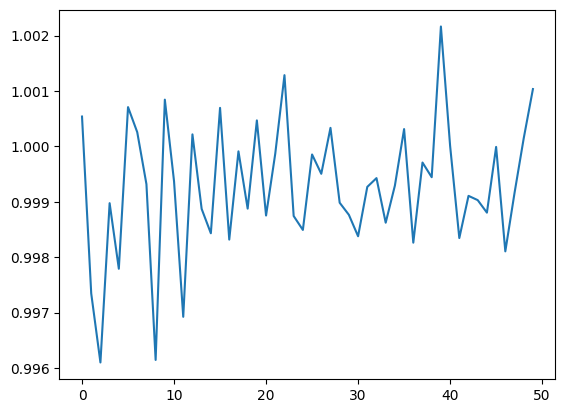

In [10]:
data_series = baseline_2norm 

relative_error = abs(max(data_series) - min(data_series)) / max(data_series) * 100
print(f"Relative error: {relative_error:.2f}%")

plt.plot(data_series)

In [16]:
data_sn = []
data_mean = []
data_mean_renormed = []
data_2norm = []
samples = 10

for hs, n, num_heads, r in tqdm(iterates[:50]):
    avg_sn = 0
    avg_mean = 0
    avg_mean_renormed = 0
    avg_2norm = 0
    for i in range(samples):
        H = n // r
        normalization = (r**(1/2) * (n**(1/2) + H**(1/2)))
        # normalization = n**(1/2)*r**(1/2)
        A = torch.randn((n, H)) / normalization
        A = torch.cat([A] * r, dim=-1)
        sn = natural_spectral_norm(A)
        avg_sn += sn / samples
        x = torch.randn((n, 100))
        Ax = A @ x
        Axnorm = Ax.norm(p=2, dim=0).mean()
        avg_mean += A.abs().mean()
        avg_mean_renormed += A.abs().mean() * (1 + r**(1/2))
        avg_2norm += Axnorm / samples / n**(1/2) * (1 + r**(1/2))

    data_sn.append(avg_sn)
    data_mean.append(avg_mean)
    data_mean_renormed.append(avg_mean_renormed)
    data_2norm.append(avg_2norm)

  0%|          | 0/50 [00:00<?, ?it/s]

Relative error: 1.37%


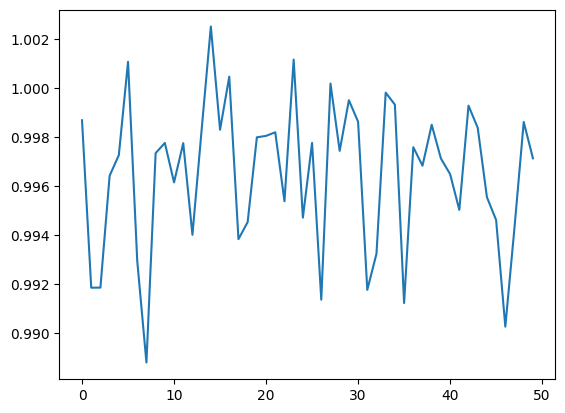

In [18]:
data_series = data_2norm

relative_error = abs(max(data_series) - min(data_series)) / max(data_series) * 100
print(f"Relative error: {relative_error:.2f}%")

plt.plot(data_series)

## Do we need to renormalize the softmax?

In [65]:
R = sorted(list(factors(384)))[1:-1]

In [86]:
## Baseline
baseline_data = []
samples = 100
for r in R:
    avg = 0
    for _ in range(samples):
        x = torch.randn((384, 10))
        WQ = torch.randn((384, 384)) / 384
        WK = torch.randn((384, 384)) / 384

        q = WQ @ x
        k = WK @ x

        a = q.T @ k / 384
        
        s = torch.softmax(a, dim=-1)
        avg += s.mean().item() / samples
    baseline_data.append(avg)

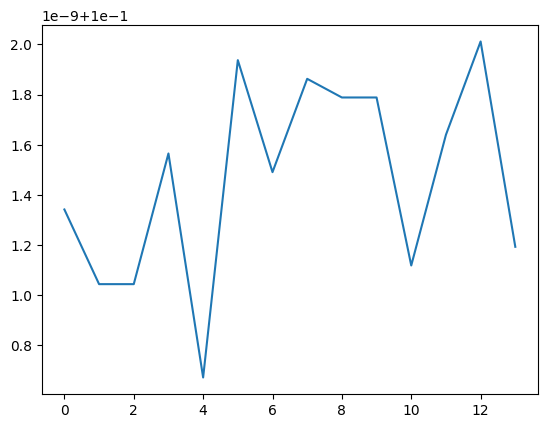

In [87]:
plt.plot(baseline_data, label='Baseline')

In [91]:
## r dependency
data = []
samples = 100
for r in R:
    avg = 0
    for _ in range(samples):
        x = torch.randn((384, 10))
        WQ = torch.randn((384, 384 // r)) / (r**(1/2) * 384**(1/2))
        WK = torch.randn((384, 384 // r)) / (r**(1/2) * 384**(1/2))

        WQ = torch.cat([WQ] * r, dim=-1)
        WK = torch.cat([WK] * r, dim=-1)

        q = WQ @ x
        k = WK @ x

        a = q.T @ k / 384
                
        s = torch.softmax(a, dim=-1)
        avg += s.mean().item() / samples
    data.append(avg)

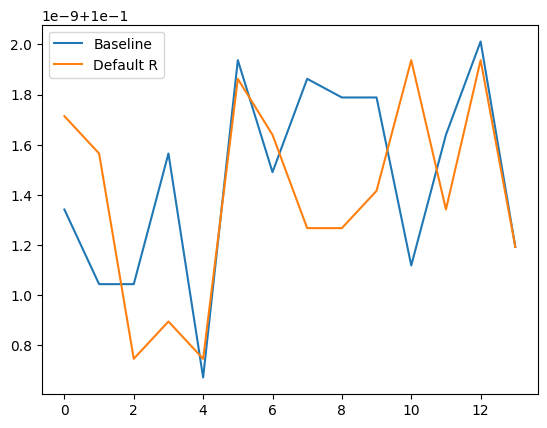

In [92]:
plt.plot(baseline_data, label='Baseline')
plt.plot(data, label='Default R')
plt.legend()
plt.show()